In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
from scipy.optimize import curve_fit
from scipy.special import erfc
import pandas as pd

In [37]:
def read_data_from_file(file_path):
    return np.loadtxt(file_path)

# utiliser le path de tes files
directory = "/home/shane/Dev/Research/Weak-measurement-group/Experimental-data/oscillo_5GS"
file_list = glob.glob(os.path.join(directory, "*.txt"))

# Crée un dictionaire pour chaque filière
data_dict = {}

for file_path in file_list:
    filename = os.path.basename(file_path)
    data_dict[filename] = read_data_from_file(file_path)


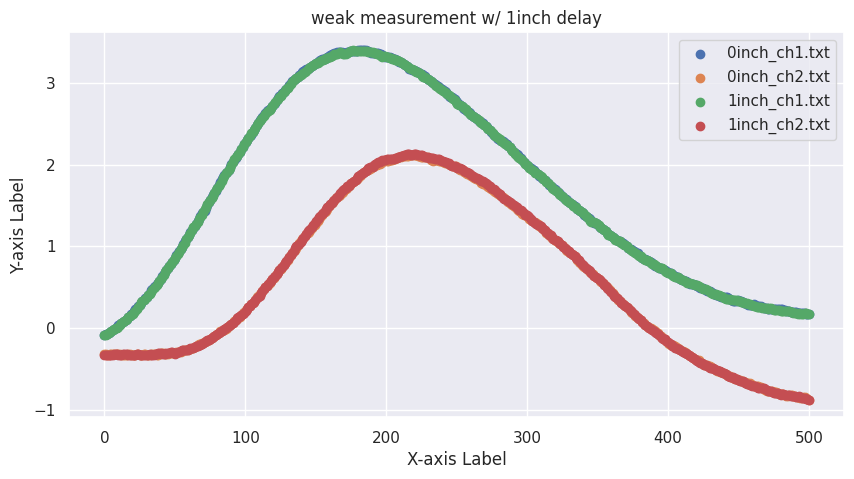

In [38]:
sb.set()

#plot ch1 et ch2 à 0 pouces
plt.figure(figsize=(10, 5))
for filename, data in list(data_dict.items()):
    x = np.linspace(0, len(data), len(data))
    plt.scatter(x,data, label=filename)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.title('weak measurement w/ 1inch delay')
plt.show()

In [39]:
def gaussian(x, A, B, C):
    return A*np.exp(-np.square((x - B)/(C)))

#curve_fit
def fit_gaussian_to_data(x, y):
    initial_guess = [1.0, np.mean(x), np.std(x)]
    # Perform the curve fit using the Gaussian function
    popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)
    return popt, pcov

popt = {}
pcov = {}

#plot chaque filière avec le curve_fit
for filename, data in data_dict.items():
    x = np.arange(len(data))
    popt[filename], pcov[filename] = fit_gaussian_to_data(x, data)


In [40]:
popt

{'0inch_ch1.txt': array([  3.38388993, 199.57382525, 142.28038061]),
 '0inch_ch2.txt': array([  2.2173027 , 228.35845694,  95.12686973]),
 '1inch_ch1.txt': array([  3.37967306, 199.59804592, 142.12623512]),
 '1inch_ch2.txt': array([  2.23101893, 228.33286448,  95.10715007])}

In [41]:
pcov

{'0inch_ch1.txt': array([[ 4.18960838e-04,  3.41447027e-04, -1.25053790e-02],
        [ 3.41447027e-04,  4.95689544e-01, -3.70636839e-02],
        [-1.25053790e-02, -3.70636839e-02,  1.07560816e+00]]),
 '0inch_ch2.txt': array([[ 1.44750843e-03,  1.69488245e-06, -4.14049256e-02],
        [ 1.69488245e-06,  1.77595844e+00, -1.58529179e-04],
        [-4.14049256e-02, -1.58529179e-04,  3.55263661e+00]]),
 '1inch_ch1.txt': array([[ 4.18395932e-04,  3.38488579e-04, -1.24852515e-02],
        [ 3.38488579e-04,  4.95128297e-01, -3.67254649e-02],
        [-1.24852515e-02, -3.67254649e-02,  1.07383931e+00]]),
 '1inch_ch2.txt': array([[ 1.46390836e-03,  1.70000174e-06, -4.16079529e-02],
        [ 1.70000174e-06,  1.77332760e+00, -1.57992708e-04],
        [-4.16079529e-02, -1.57992708e-04,  3.54737242e+00]])}

In [42]:
#erreur dans les paramètres
for filename in pcov.keys():
    print(np.sqrt(np.diag(pcov[filename])))

[0.02046853 0.70405223 1.03711531]
[0.03804614 1.33265091 1.88484392]
[0.02045473 0.70365353 1.03626218]
[0.03826106 1.33166347 1.88344695]


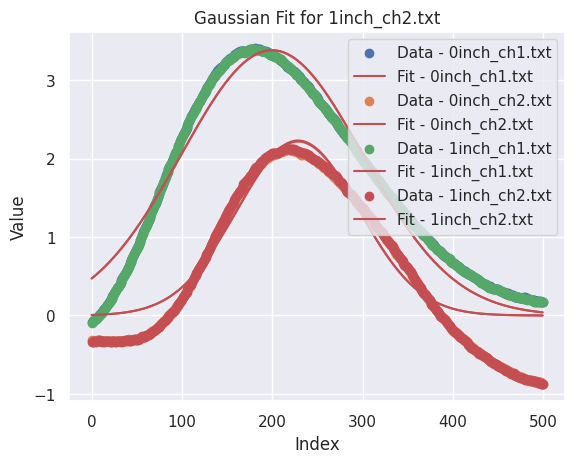

In [43]:
for filename, data in data_dict.items():
    plt.scatter(x, data, label=f"Data - {filename}")
    fitted_curve = gaussian(x, popt[filename][0], popt[filename][1], popt[filename][2])
    plt.plot(x, fitted_curve, color='r', label=f"Fit - {filename}")

    
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.title(f"Gaussian Fit for {filename}")
plt.show()

/tmp/ipykernel_57544/3495107934.py:2: RuntimeWarning: invalid value encountered in log
  plt.scatter(x, np.log(data), label=f"Data - {filename}")


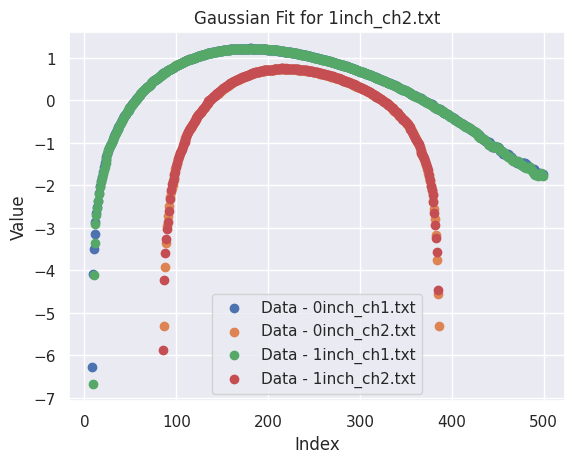

In [44]:
for filename, data in data_dict.items():
    plt.scatter(x, np.log(data), label=f"Data - {filename}")
    #fitted_curve = gaussian(x, popt[filename][0], popt[filename][1], popt[filename][2])
    #plt.plot(x, fitted_curve, color='r', label=f"Fit - {filename}")

    
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.title(f"Gaussian Fit for {filename}")
plt.show()

In [45]:
def parrabola(x, A, B, C):
    return A + -np.square((x-B))/C

def fit_parra_to_data(x, y):
    initial_guess = [1.0, np.mean(x), np.std(x)]
    # Perform the curve fit using the Gaussian function
    popt, pcov = curve_fit(parrabola, x, y, p0=initial_guess)
    return popt, pcov

popt = {}
pcov = {}


for filename, data in data_dict.items():
    x = np.arange(len(data))
    y = 1*(np.min(data_dict[filename]) + data_dict[filename])
    #print(y)
    popt[filename], pcov[filename] = fit_parra_to_data(x, y)

/tmp/ipykernel_57544/315987775.py:2: RuntimeWarning: invalid value encountered in log
  plt.scatter(x, np.min(data_dict[filename]) + np.log(data), label=f"Data - {filename}")


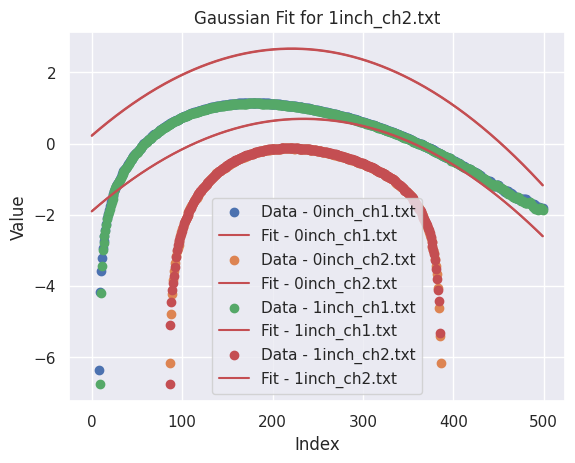

In [46]:
for filename, data in data_dict.items():
    plt.scatter(x, np.min(data_dict[filename]) + np.log(data), label=f"Data - {filename}")
    fitted_curve = parrabola(x, popt[filename][0], popt[filename][1], popt[filename][2])
    plt.plot(x, fitted_curve, color='r', label=f"Fit - {filename}")

    
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.title(f"Gaussian Fit for {filename}")
plt.show()